**Importing all the necessary module for my Task**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mounting the Drive for access the dataset

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
file_path = '/content/drive/My Drive/sparktech_task_dataset/airbnb.csv'
dataset = pd.read_csv(file_path)

**Exploratory Data Analysis**

In [30]:
dataset.head(10)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
5,5,48650769,CasaMia White Suite Treehouse,New,0,Casamia,261290482.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,2 beds,1 bathroom","Lake view,Mountain view,Waterfront,Wifi,Dedica...",...,14729,Turkey,1,2,2,0,1,0,After 2 00 pm,12 00 pm
6,6,50765985,Ladin Bungalow,New,0,Stephen,15084529.0,"Kaş, Antalya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Garden view,Mountain view,Kitchen,Wifi,Dedicat...",...,12312,Turkey,1,1,2,0,1,0,After 3 00 pm,11 00 am
7,7,40947216,Lavender House,New,0,Caner,318794897.0,"Akçalı, Giresun, Turkey","8 guests,1 bedroom,2 beds,1 bathroom","Wifi,Dedicated workspace,Free parking on premi...",...,13655,Turkey,1,2,8,0,1,0,Flexible,NaN
8,8,34043569,Prince's,New,0,Tu,221057563.0,"Thành phố Đà Lạt, Lâm Đồng, Vietnam","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,1747,Vietnam,1,1,2,0,1,0,After 1 00 pm,11 00 am
9,9,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583.0,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",...,30486,Thailand,3,6,10,0,4,0,After 3 00 pm,NaN


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [32]:
dataset.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,8
host_id,0
address,0
features,0
amenities,0


we can see that here in the dataset have some null value but these two column is not necessary for my project. So, I don't have to remove or fill it with the mean, mod value.

In [33]:
nullvalue=[var for var in dataset.columns if dataset[var].isnull().sum()>1]
for var in nullvalue:
    print(var,np.round(dataset[var].isnull().mean(),3),'% missing values')

host_name 0.001 % missing values
checkin 0.062 % missing values
checkout 0.191 % missing values


In [34]:
dataset.describe()

,Unnamed: 0,id,host_id,price,bathrooms,beds,guests,toiles,bedrooms,studios
count,12805.000000,1.280500e+04,1.280500e+04,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,6402.000000,7.525187e+16,1.638192e+08,1.769780e+04,1.874424,3.316751,5.213745,0.019211,2.136041,0.023585
std,3696.629433,2.007933e+17,1.413622e+08,4.569364e+04,2.091399,4.037791,3.808830,0.137272,2.359005,0.151757
min,0.000000,1.313100e+04,2.303900e+04,3.930000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3201.000000,2.023958e+07,3.700032e+07,3.994000e+03,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
50%,6402.000000,3.682229e+07,1.256459e+08,8.175000e+03,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000
75%,9603.000000,4.999760e+07,2.639623e+08,1.606200e+04,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000
max,12804.000000,7.017905e+17,4.758973e+08,1.907963e+06,50.000000,98.000000,16.000000,1.000000,50.000000,1.000000


In [35]:
dataset.columns

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')

In [36]:
num_entries, num_features = dataset.shape
print(f'Number of entries (rows): {num_entries}')
print(f'Number of features (columns): {num_features}')

Number of entries (rows): 12805
Number of features (columns): 23


Top 10 high paid country

country
 Seychelles              155225.111111
 Honduras                140998.500000
 United Arab Emirates    119633.653846
 Bahamas                 116397.500000
 Qatar                   112717.500000
 Belize                  111575.153846
Belize                   110603.000000
 Colombia                 93451.153846
 Jamaica                  82766.000000
Maldives                  82202.250000
Name: price, dtype: float64


<ipython-input-37-107d7e6be4ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


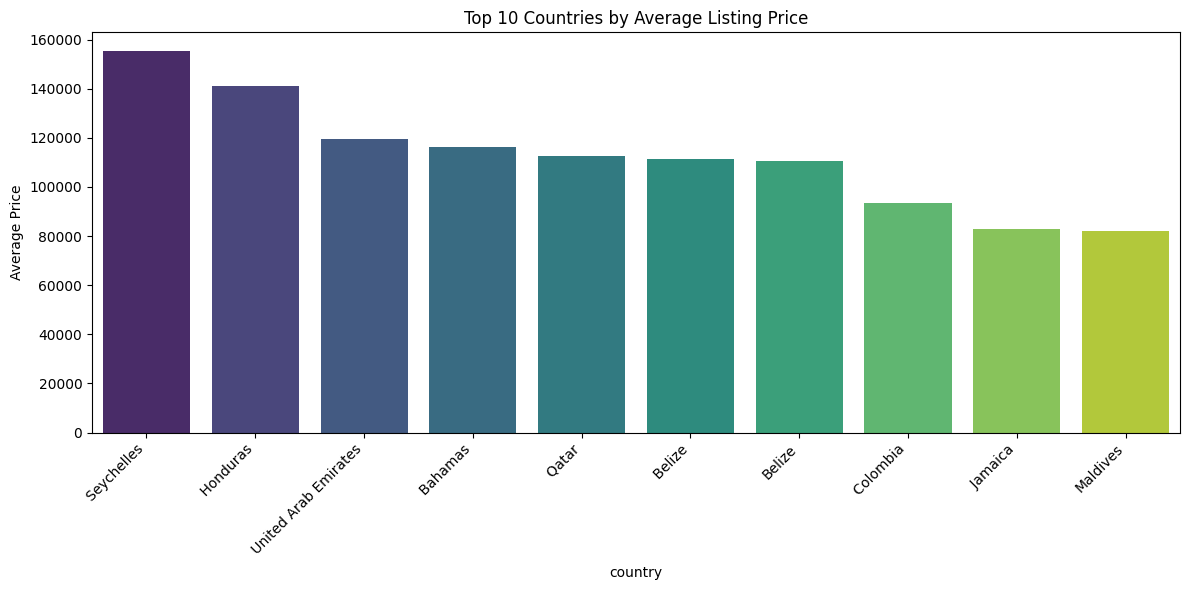

In [37]:
avg_price_by_country = dataset.groupby('country')['price'].mean().sort_values(ascending=False)
print(avg_price_by_country.head(10))
top_countries = avg_price_by_country.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price')
plt.title('Top 10 Countries by Average Listing Price')
plt.tight_layout()
plt.show()

**Feature Engineering**

Dropping unnecessary column

In [39]:
columns_to_drop = ['Unnamed: 0', 'id', 'name', 'img_links', 'host_name', 'host_id','features','amenities','safety_rules','checkin', 'checkout','hourse_rules','address']
dataset.drop(columns=columns_to_drop, inplace=True)
print(dataset.columns)

Index(['rating', 'reviews', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios'],
      dtype='object')


In [40]:
dataset.head(5)

,rating,reviews,price,country,bathrooms,beds,guests,toiles,bedrooms,studios
0,4.71,64,8078,Turkey,1,1,2,0,2,0
1,New,0,4665,Turkey,2,2,4,0,2,0
2,4.85,68,5991,Georgia,1,3,4,0,1,0
3,5.0,13,11339,Turkey,1,2,4,0,1,0
4,New,0,6673,Turkey,1,1,2,0,1,0


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     12805 non-null  object
 1   reviews    12805 non-null  object
 2   price      12805 non-null  int64 
 3   country    12805 non-null  object
 4   bathrooms  12805 non-null  int64 
 5   beds       12805 non-null  int64 
 6   guests     12805 non-null  int64 
 7   toiles     12805 non-null  int64 
 8   bedrooms   12805 non-null  int64 
 9   studios    12805 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1000.5+ KB


Checking the duplicate value, if need to remove it then we will remove.

In [45]:
has_duplicates = dataset.duplicated().any()
print("Any duplicate rows:", has_duplicates)
duplicate_count = dataset.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Any duplicate rows: True


In [47]:
country_counts = dataset['country'].value_counts()
duplicate_countries = country_counts[country_counts > 1]
print("Countries that appear more than once:\n", duplicate_countries)

Countries that appear more than once:
 country
 India             2766
 Italy             1186
 Greece             885
 Thailand           677
 Turkey             519
                   ... 
 Cayman Islands       2
Norway                2
Cuba                  2
 Qatar                2
 Guadeloupe           2
Name: count, Length: 122, dtype: int64


In [48]:
rows_with_duplicate_countries = dataset[dataset['country'].isin(duplicate_countries.index)]
print(rows_with_duplicate_countries)

      rating reviews  price       country  bathrooms  beds  guests  toiles  \
0       4.71      64   8078        Turkey          1     1       2       0   
1        New       0   4665        Turkey          2     2       4       0   
2       4.85      68   5991       Georgia          1     3       4       0   
3        5.0      13  11339        Turkey          1     2       4       0   
4        New       0   6673        Turkey          1     1       2       0   
...      ...     ...    ...           ...        ...   ...     ...     ...   
12800   4.94      16   4288   South Korea          8     0       4       0   
12801   4.67       6  15200     Indonesia          0     1       2       1   
12802   4.67       3   9103        Uganda          1     2       2       0   
12803   4.86       7  42262     Indonesia          2     4       8       0   
12804   4.85      13   9909         Japan          1     2       5       0   

       bedrooms  studios  
0             2        0  
1        

Here is the shape of the dataset before removing duplicate value

In [49]:
dataset.shape

(12805, 10)

In [50]:
new_dataset = dataset.drop_duplicates(subset=['country'])

Here is the shape of the dataset after removing the duplicate value

In [51]:
new_dataset.shape

(148, 10)

**Let's encode the object column**

In [52]:
label_encoder=LabelEncoder()
for j in dataset.columns:
    if dataset[j].dtype == 'object':
        dataset[j] = label_encoder.fit_transform(dataset[j])

Checking correlation between all columns

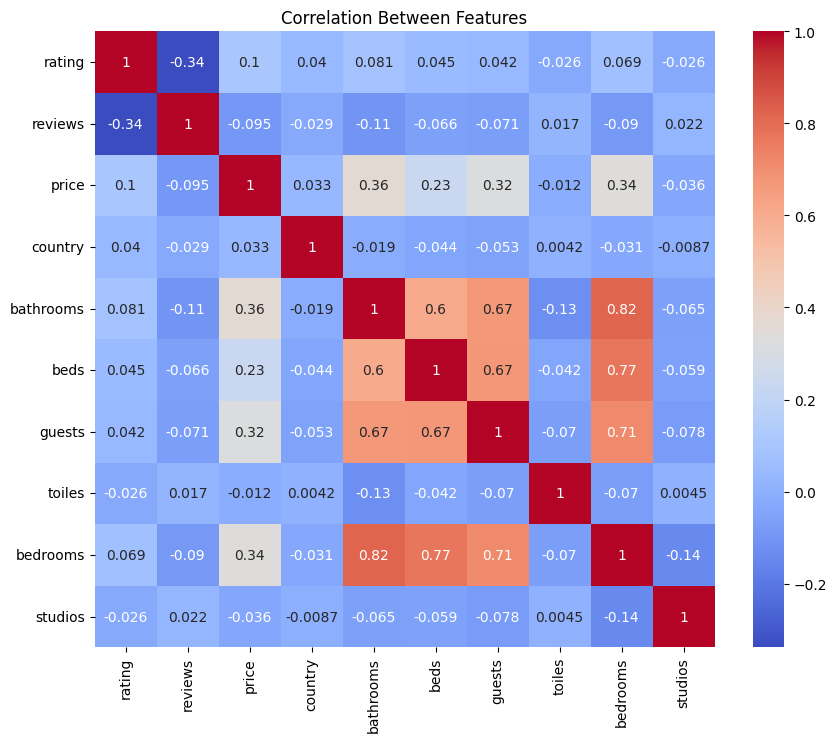

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

**Now it's time to normalizw the value with standarScaler**

In [55]:
standard_scaler=StandardScaler()

In [56]:
for column in dataset.columns:
    if dataset[column].dtype == 'float64' or dataset[column].dtype == 'int64':
        dataset[column] = standard_scaler.fit_transform(dataset[[column]])

In [57]:
dataset.head(5)

,rating,reviews,price,country,bathrooms,beds,guests,toiles,bedrooms,studios
0,-1.519681,1.448073,-0.210536,1.587254,-0.418121,-0.573789,-0.843795,-0.139956,-0.057671,-0.155416
1,0.775253,-1.053210,-0.285232,1.587254,0.060046,-0.326120,-0.318678,-0.139956,-0.057671,-0.155416
2,-0.448711,1.496575,-0.256212,-0.893586,-0.418121,-0.078450,-0.318678,-0.139956,-0.481595,-0.155416
3,0.698756,-0.803774,-0.139167,1.587254,-0.418121,-0.326120,-0.318678,-0.139956,-0.481595,-0.155416
4,0.775253,-1.053210,-0.241286,1.587254,-0.418121,-0.573789,-0.843795,-0.139956,-0.481595,-0.155416


**Spliting the whole dataset into part such as X and Y**

In [58]:
x=dataset.drop('price',axis=1)
y=dataset['price']

In this section considering the train and test

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

**Sequential Dense Model**

In [60]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [62]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9477 - val_loss: 0.7084
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1235 - val_loss: 0.6737
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7536 - val_loss: 0.7212
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9372 - val_loss: 0.6790
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9311 - val_loss: 0.6995
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5246 - val_loss: 0.6825
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7132 - val_loss: 0.7573
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8017 - val_loss: 0.6643
Epoch 9/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7724 - val_loss: 0.6715
Epoch 10/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6384 - val_loss: 0.6923
Epoch 11/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6597 - val_loss: 0.7369
Epoch 12/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Error (MAE): 0.2801957925862984
Mean Squared Error (MSE): 0.714913991730156
Root Mean Squared Error (RMSE): 0.8455258669787435
R^2 Score: 0.13772282554338156


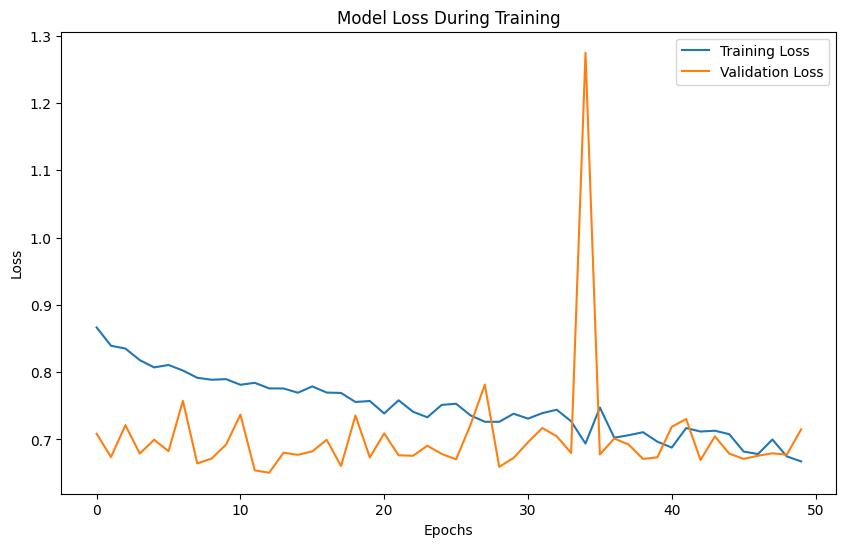

In [63]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
################################
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's play with some Ensemble Methods: 1-Linear Regression 2-DecisionTree 3-GradientBoosting 4-RandomForest

Linear Regression

In [64]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [65]:
prediction=linear_reg.predict(x_test)

In [66]:
prediction

array([ 0.22874578, -0.1906047 , -0.16800383, ...,  0.74254865,
       -0.05764721, -0.11076329])

In [67]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
###############################################
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.759452975593059
Root Mean Squared Error: 0.8714659922183189
R² Score: 0.08400314792799535


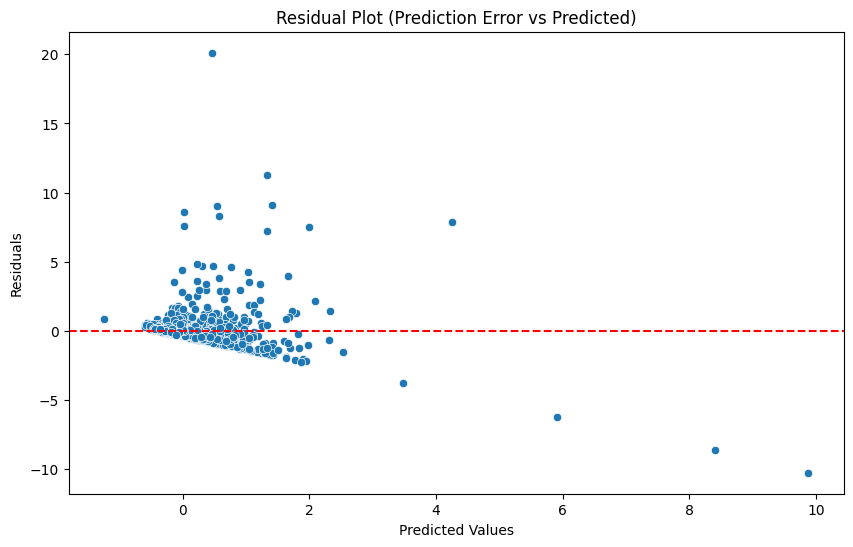

In [68]:
residuals = y_test - prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Prediction Error vs Predicted)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

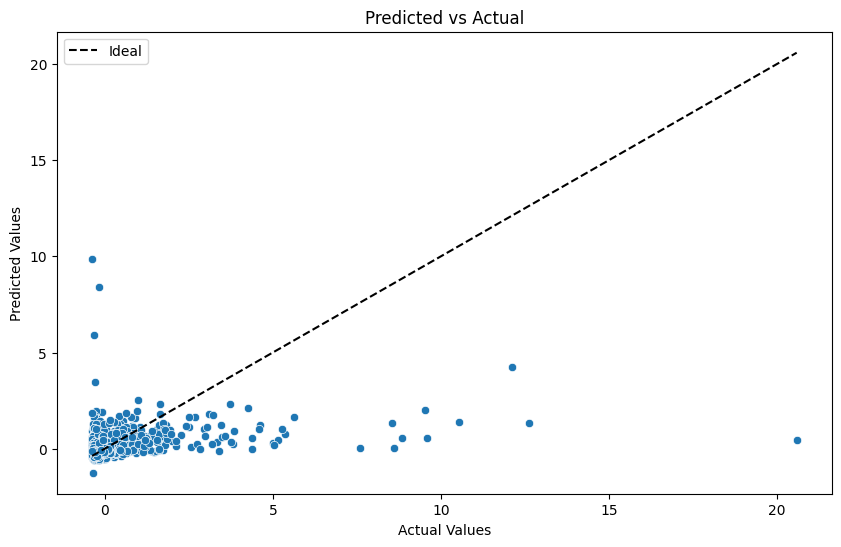

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

<ipython-input-70-6a050d839190>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Values', shade=True)
<ipython-input-70-6a050d839190>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prediction, label='Predicted Values', shade=True)


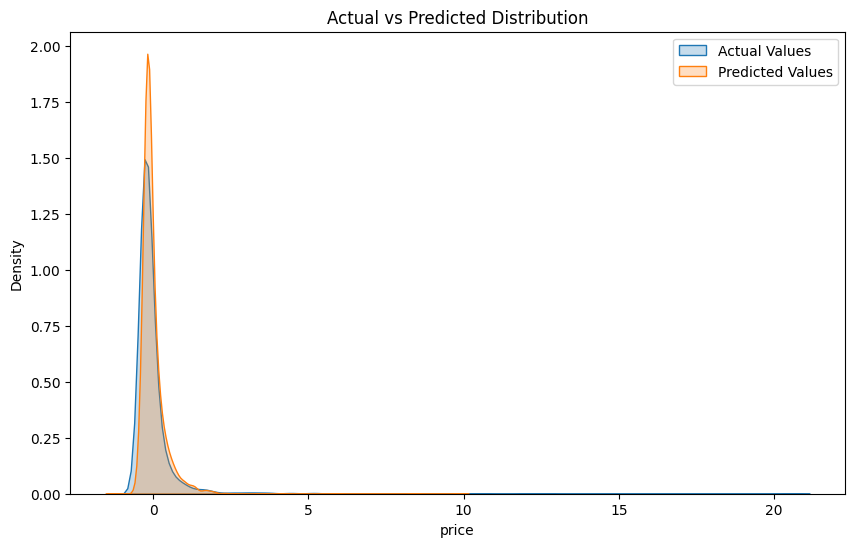

In [70]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values', shade=True)
sns.kdeplot(prediction, label='Predicted Values', shade=True)
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()

Decission Tree

In [71]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
dt_prediction=dt.predict(x_test)

In [73]:
dt_prediction

array([ 0.06222552, -0.32474377, -0.10636031, ..., -0.23791547,
       -0.17151172, -0.29062508])

In [74]:
mse = mean_squared_error(y_test, dt_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_prediction)
###############################################
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.3496685137752975
Root Mean Squared Error: 1.1617523461458115
R² Score: -0.6278718362956568


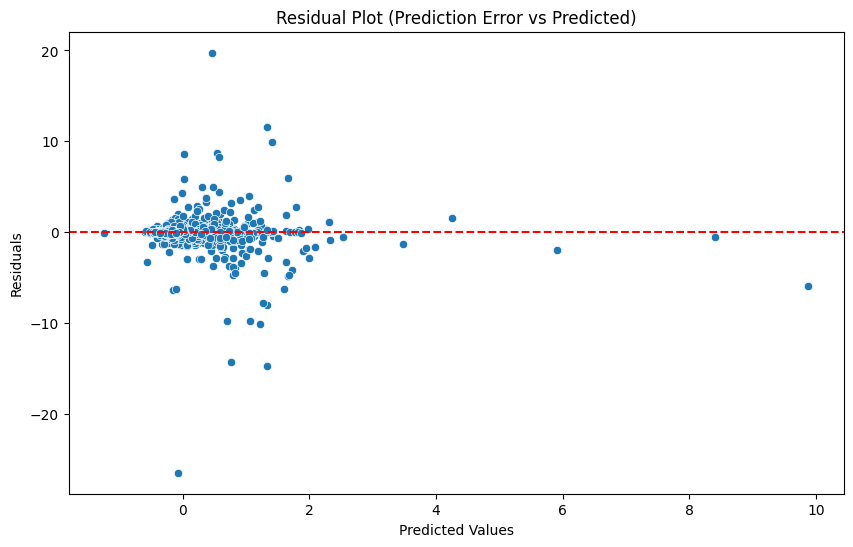

In [75]:
residuals = y_test - dt_prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Prediction Error vs Predicted)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

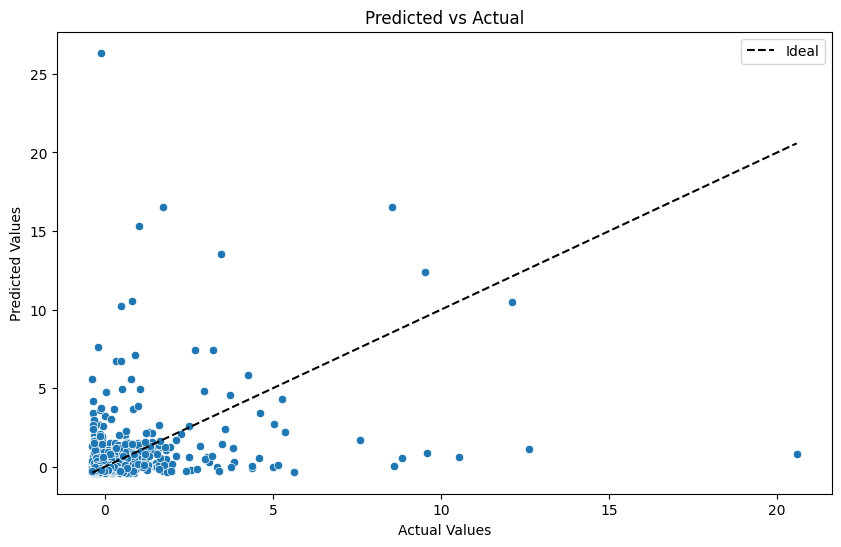

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=dt_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Gradient Boosting

In [77]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_prediction=gb.predict(x_test)

In [78]:
gb_prediction

array([-0.07972183, -0.29947308, -0.07552171, ...,  0.42175906,
       -0.19782365, -0.23279327])

In [79]:
mse = mean_squared_error(y_test, gb_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_prediction)
###############################################
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.5921412885183288
Root Mean Squared Error: 0.7695071724931021
R² Score: -0.6278718362956568


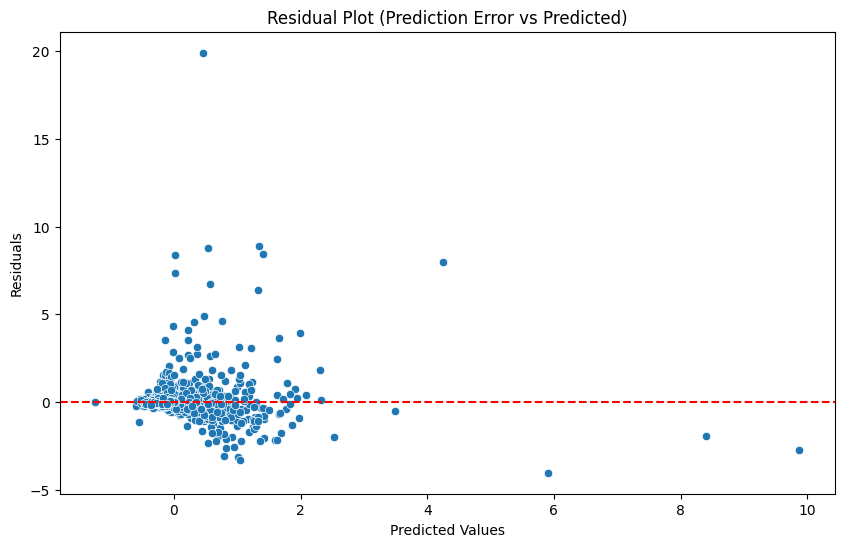

In [80]:
residuals = y_test - gb_prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Prediction Error vs Predicted)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

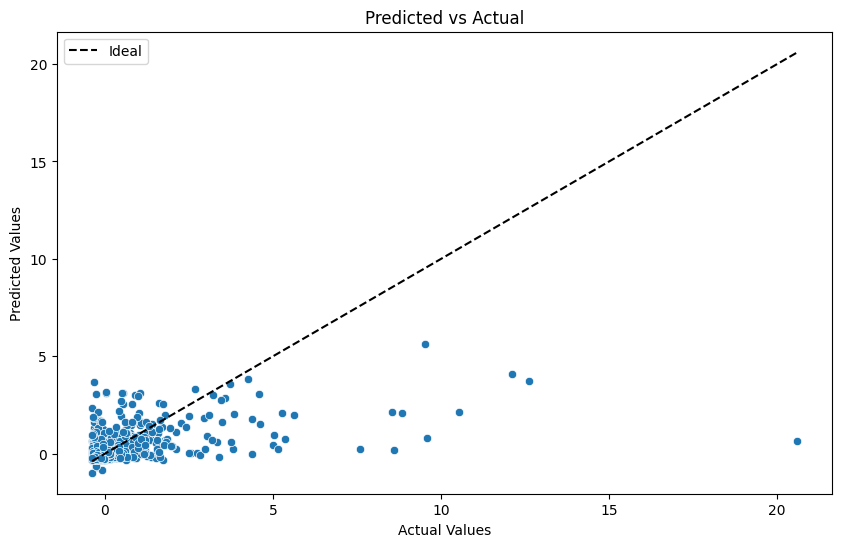

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Random Forest

In [82]:
rd=RandomForestRegressor()
rd.fit(x_train,y_train)
rd_prediction=rd.predict(x_test)
rd_prediction

array([-0.10962544, -0.32539348, -0.14169228, ...,  0.04576132,
       -0.16972432, -0.29361933])

In [83]:
mse = mean_squared_error(y_test, rd_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_prediction)
###############################################
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.7412366553444165
Root Mean Squared Error: 0.8609510179704862
R² Score: -0.6278718362956568


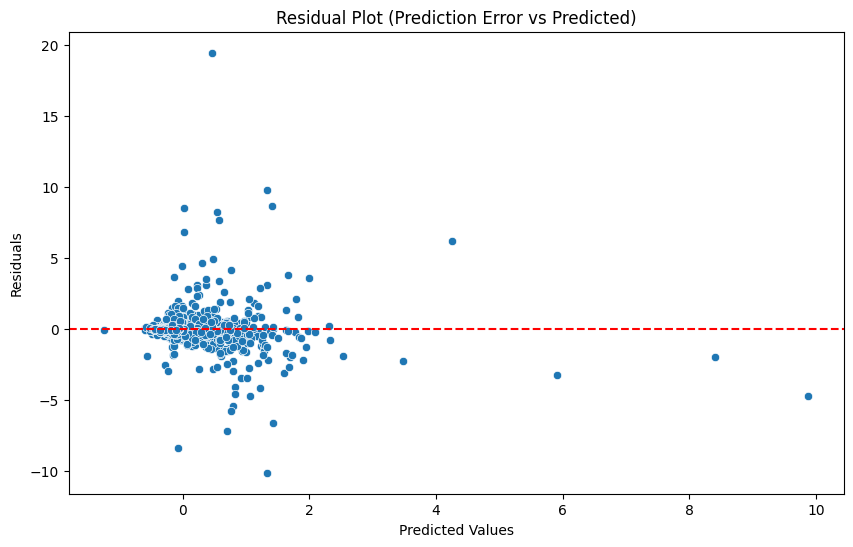

In [84]:
residuals = y_test - rd_prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Prediction Error vs Predicted)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

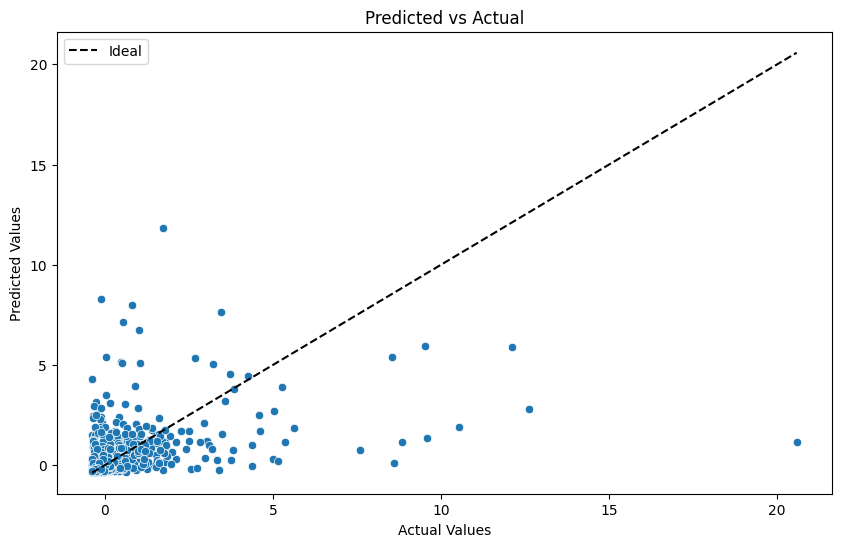

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rd_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Ideal')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()